# Dano Gillam Lab3

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import scipy.io
%matplotlib inline
%pylab inline

from sklearn.neighbors import KernelDensity

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#load our data
 
train_mat = scipy.io.loadmat('mnist_train.mat')

train_data = train_mat['images']
train_labels = train_mat['labels']

test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

In [ ]:
def test_classifier(classify,name ='kde',n=100):
    correct = 0
    confusion_matrix = np.zeros((10,10)) 
    for i in xrange(n):
        test_letter = test_data[:,i]
        test_label = test_labels[i,0]
        predicted_label = classify(test_letter)
        #print test_label,' = ',predicted_label
        confusion_matrix[predicted_label,test_label]+=1
        if predicted_label==test_label:correct+=1
    error = (n-correct)/n
    plt.pcolormesh(confusion_matrix)    
    plt.gca().invert_yaxis()
    plt.title('Confusion matrix using '+name+' on '+str(n)+' characters')    
    plt.colorbar()
    plt.xlabel('True class')
    plt.ylabel('Predicted class')
    plt.show()
    print 'classification error rate: ',round(error*100,2),'%'

# Part 1

In [ ]:
#plot expected value of a class
avg_letters = {}
for i in set(train_labels[:,0]):
    letter_data = train_data[:,train_labels[:,0]==i]
    avg_letter = np.mean(letter_data,axis=1)
    avg_letters[i]=avg_letter
    plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow( avg_lD[1].reshape(28,28)etter.reshape(28,28).T, interpolation='nearest', cmap=matplotlib.cm.gray)
plt.show()
print type(avg_letters.values())

# Part 2

In [3]:
#classify a single point by comparing means of averages to means of our num

def simple_classify(let):
    nearest_let = 0
    nearest_dist = np.inf
    for key in avg_letters.keys():
        dist =  np.mean((np.array(avg_letters[key])-let)**2)
        if dist < nearest_dist:
            nearest_let = key
            nearest_dist = dist
    return nearest_let

    

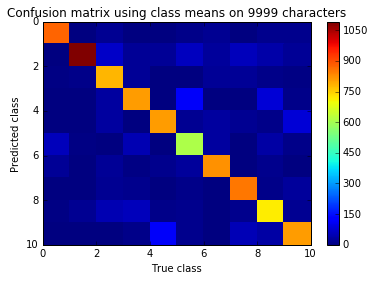

classification error rate:  17.97 %


In [4]:
#simple_classify on our test_data using train_data
test_classifier(simple_classify,'class means',9999)

# Part 3

### The variance of our kernal does matter. especially for the extra credit problem.

In [ ]:
def multinorm(x,mew,var=1):
    return np.exp(var*-.5*np.dot(x-mew,x-mew))

def kde_classify(let,data=train_data,labels=train_labels):
    scores = np.zeros(len(set(labels[:,0])))
    for class_ in set(labels[:,0]):
        class_data = data[:,train_labels[:,0]==class_]  
        for char in class_data.T:
            scores[class_] += multinorm(let,char)
        scores[class_]/=len(class_data)
    return argmax(scores)       
    

In [ ]:
test_classifier(kde_classify,'kde')

# Extra Credit

### By raising the variance and checking for the image with the lowest max probability of being a number, I found this picture of a cat.

In [ ]:
def multinorm(x,mew,var=1):
    return np.exp(var*-.5*np.dot(x-mew,x-mew))


def kde_classify(let,data=train_data,labels=train_labels):
    scores = np.zeros(len(set(labels[:,0])))
    for class_ in set(labels[:,0]):
        class_data = data[:,train_labels[:,0]==class_]  
        for char in class_data.T:
            scores[class_] += multinorm(let,char,.2)
        scores[class_]/=len(class_data)
    return argmax(scores),max(scores)   


def find_outlier(classify,name ='kde',n=100):
    outlier = 0
    outlier_score = .9
    for i in xrange(n):
        test_letter = train_data[:,i]
        predicted_score = classify(test_letter)[1]###############33
        if predicted_score<outlier_score:
            outlier_score = predicted_score
            outlier = i
    print 'outlier = ',outlier,'with FP: ',outlier_score
    return outlier

outlier = find_outlier(kde_classify)
plt.imshow( train_data[:,outlier].reshape(28,28).T, interpolation='nearest', cmap=matplotlib.cm.gray)

# Practice stuff

In [ ]:
#test 
n = 100 # a number index to classify
print train_labels[n]
practice_letter = train_data[:,n]
plt.subplot(1,2,1)
plt.imshow( practice_letter.reshape(28,28).T, interpolation='nearest', cmap=matplotlib.cm.gray)


print classify(practice_letter)
classified_practice_letter = avg_letters[classify(practice_letter)]
plt.subplot(1,2,2)
plt.imshow( classified_practice_letter.reshape(28,28).T, interpolation='nearest', cmap=matplotlib.cm.gray)
plt.show()

In [ ]:
#a built in kde function
from scipy.stats import gaussian_kde 

kde = gaussian_kde(range(11))

X = np.linspace(-2,8,100)
plt.plot(X,kde.pdf(X))
plt.show()


In [ ]:
#a built in normal function
from scipy.stats import multivariate_normal as normal
X = np.linspace(-2,10,100)
Y = normal.pdf(X,4,2)
plt.plot(X,Y)
plt.show()

In [ ]:
#my kde function
def kde(M,a=-2,b=12,var=1.1):
    #Arg: M our list of data
    SIZE = 100
    X = np.linspace(a,b,SIZE)
    Y = np.zeros(SIZE)
    for i in M:
        Y += normal.pdf(X,i,var)
    Y/=len(M)
    plt.plot(X,Y)
    plt.show()
kde([1,2,2,2,2,3,3,3,4,4,4,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,10],-2,12,.05)

In [ ]:
avg_letters_list = np.array([avg_letters[key] for key in avg_letters.keys()])
print avg_letters_list.shape
print np.mean(avg_letters_list,axis=1).shape
def lettergraph(let):
    sol = []
    for i in xrange(784):
        sol += [i]*int(avg_letters[let][i]*1000)
    return sol
kde(lettergraph(3),0,784,20)